In [1]:
# 安裝必要套件（Colab 通常已內建 TensorFlow 和 Gradio）
# !pip install gradio openpyxl

In [2]:
# 匯入必要套件
import pandas as pd
import numpy as np
# import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# 載入資料
df = pd.read_excel("D5094_TVStestData.xlsx")
df_clean = df.dropna(subset=["Vc_1", "Ipp_1", "Vc_2", "Ipp_2"])

X = df_clean[["Vc_1", "Ipp_1"]].values
y = df_clean[["Vc_2", "Ipp_2"]].values
# 標準化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [4]:
import joblib
joblib.dump(scaler_X, "scaler_X.pkl")
joblib.dump(scaler_y, "scaler_y.pkl")

['scaler_y.pkl']

In [5]:
# 分割訓練/測試
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [6]:
# 建立 Keras MLP 模型
model = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(2)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=1500, batch_size=4, verbose=0, validation_split=0.2)

In [7]:
print('Train Loss:', history.history['loss'][-1])
print('Val Loss:', history.history['val_loss'][-1])

Train Loss: 8.944330692761682e-11
Val Loss: 0.019978828728199005


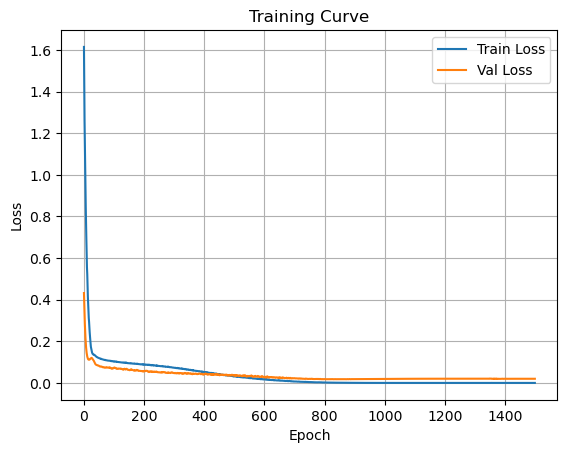

In [8]:
# 繪製 Loss 曲線
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Curve")
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# 儲存模型
model.save("mlp_tvs_model.h5")

In [10]:
# 預測與反標準化
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

1/1 [==============================] - 0s 70ms/step


In [11]:
# 顯示部分預測結果
result_df = pd.DataFrame({
    "Vc_2_Pred": y_pred[:, 0],
    "Ipp_2_Pred": y_pred[:, 1],
    "Vc_2_True": y_true[:, 0],
    "Ipp_2_True": y_true[:, 1]
})
print(result_df.head())

   Vc_2_Pred  Ipp_2_Pred  Vc_2_True  Ipp_2_True
0  59.648106  331.915649  59.933333  290.666667
1  89.630585  177.935455  86.100000  140.666667
2  35.794945  506.275024  29.300000  880.000000
